![image.png](attachment:image.png)

# Tarefa

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?"

Nosso objetivo é tentar agrupar os clientes conforme seu comportamento de navegação entre páginas administrativas, informativas e de produtos.

As variáveis estão descritas abaixo (em tradução livre do link indicado).

Por este motivo, o escopo desta análise estará fechado nas primeiras seis variáveis da tabela, referentes a quantidade e tempo de acesso por tipo de página, atributos que falam mais do comportamento de navegação do cliente que de características da página o da época do ano.

|Variavel                |Descrição          |
|------------------------|:-------------------|
|Administrative          | Quantidade de acessos em páginas administrativas|
|Administrative_Duration | Tempo de acesso em páginas administrativas |
|Informational           | Quantidade de acessos em páginas informativas  |
|Informational_Duration  | Tempo de acesso em páginas informativas  |
|ProductRelated          | Quantidade de acessos em páginas de produtos |
|ProductRelated_Duration | Tempo de acesso em páginas de produtos |
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  |
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações |
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico |
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) |
|Month                   | Mês  |
|OperatingSystems        | Sistema operacional do visitante |
|Browser                 | Browser do visitante |
|Region                  | Região |
|TrafficType             | Tipo de tráfego                  |
|VisitorType             | Tipo de visitante: novo ou recorrente |
|Weekend                 | Indica final de semana |
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

Visualização inicial da base de dados:
   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00     

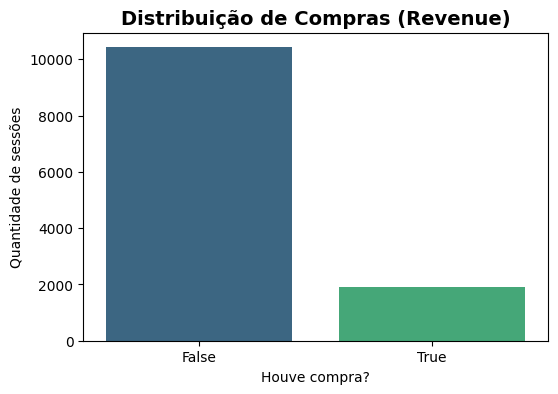

In [9]:
# Importação das bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Carregar a base de dados
# 👉 Certifique-se de que o arquivo 'online_shoppers_intention.csv'
# está na mesma pasta deste script ou ajuste o caminho completo
df = pd.read_csv('/content/Profissão Cientista de Dados M29 - online_shoppers_intention.csv')

# Visualizar as primeiras linhas da base
print("Visualização inicial da base de dados:")
print(df.head())

# Contagem da variável alvo (Revenue = houve compra ou não)
print("\nDistribuição da variável 'Compra (Revenue)':")
print(df['Revenue'].value_counts(dropna=False))

# Plotar gráfico da variável alvo
plt.figure(figsize=(6,4))
sns.countplot(x='Revenue', data=df, palette='viridis', hue='Revenue', legend=False)
plt.title("Distribuição de Compras (Revenue)", fontsize=14, fontweight="bold")
plt.xlabel("Houve compra?")
plt.ylabel("Quantidade de sessões")
plt.show()

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

📊 Estatísticas descritivas das variáveis do escopo:
       Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  
count            12330.000000    12330.000000             12330.000000  
mean                34.472398       31.731468              1194.746220  
std                140.749294       44.475503              1913.669288  
min                  0.000000        0.000000                 0.000000

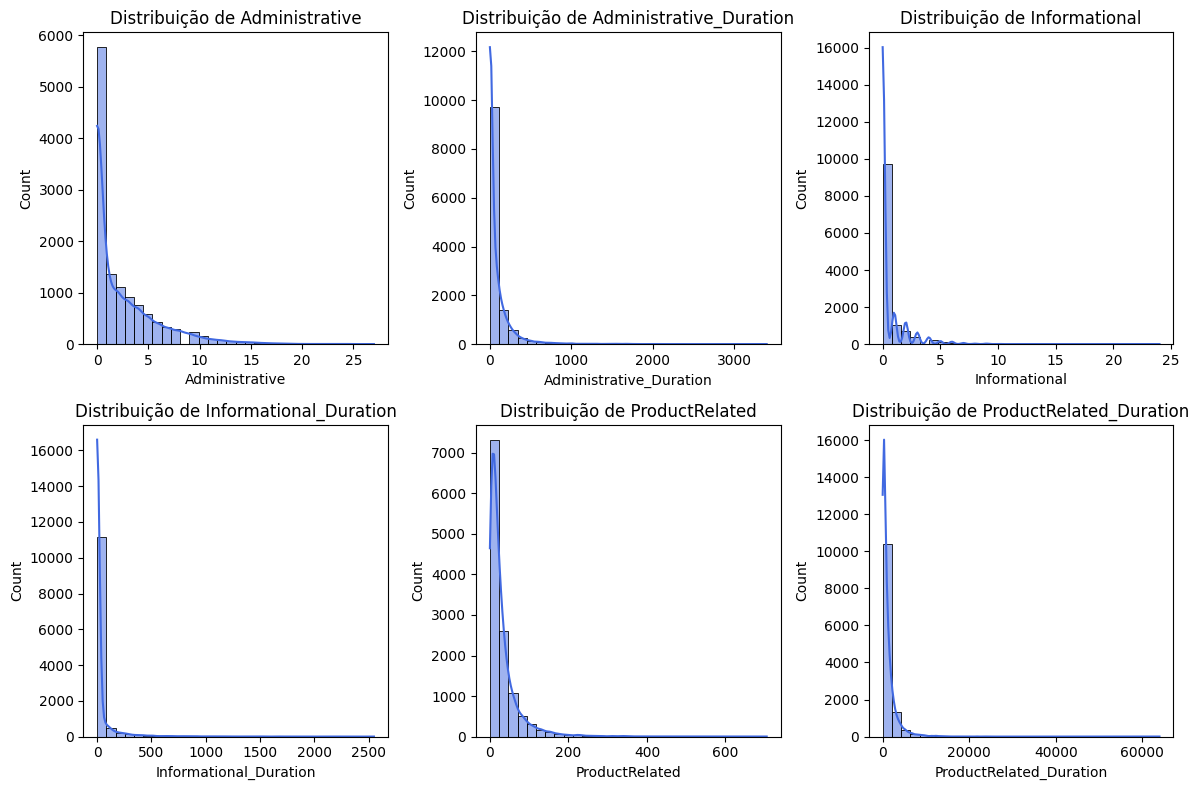


📊 Estatísticas após transformação logarítmica:
       Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         0.796964                 2.306655       0.236899   
std          0.862851                 2.364922       0.495537   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          0.693147                 2.140066       0.000000   
75%          1.609438                 4.546017       0.000000   
max          3.332205                 8.131457       3.218876   

       Informational_Duration  ProductRelated  ProductRelated_Duration  
count            12330.000000    12330.000000             12330.000000  
mean                 0.844331        2.885527                 5.962529  
std                  1.816394        1.123923                 2.043091  
min                  0.000000        0.000000                 0.000000  
2

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar a base
df = pd.read_csv("/content/Profissão Cientista de Dados M29 - online_shoppers_intention.csv")

# Selecionar apenas as variáveis do escopo
variaveis = [
    "Administrative",
    "Administrative_Duration",
    "Informational",
    "Informational_Duration",
    "ProductRelated",
    "ProductRelated_Duration"
]
df_escopo = df[variaveis]

# 1. Estatísticas descritivas
print("📊 Estatísticas descritivas das variáveis do escopo:")
print(df_escopo.describe())

# 2. Verificar valores ausentes
print("\n🔎 Verificação de valores ausentes:")
print(df_escopo.isnull().sum())

# 3. Distribuição das variáveis (histogramas)
print("\n📈 Plotando distribuições...")
plt.figure(figsize=(12,8))
for i, col in enumerate(variaveis, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], bins=30, kde=True, color="royalblue")
    plt.title(f"Distribuição de {col}")
plt.tight_layout()
plt.show()

# 4. Tratamento de valores missing (se houver)
# Neste dataset original não há valores missing, mas se houvesse:
# Exemplo: preencher com 0 ou com a mediana
if df_escopo.isnull().sum().sum() > 0:
    df_escopo = df_escopo.fillna(0)  # ou df_escopo.fillna(df_escopo.median())
    print("\n✅ Valores ausentes tratados (preenchidos com 0).")

# 5. Possível tratamento adicional
# Como são variáveis de contagem/tempo, podemos aplicar log-transformação
# para reduzir assimetria em distribuições muito enviesadas
import numpy as np
df_log = df_escopo.copy()
for col in variaveis:
    df_log[col] = np.log1p(df_log[col])  # log(1+x) para evitar log(0)

print("\n📊 Estatísticas após transformação logarítmica:")
print(df_log.describe())

## Número de grupos

Utilize as técnicas vistas em aula que te ajudem a decidir pelo número de grupos a ser utilizados.

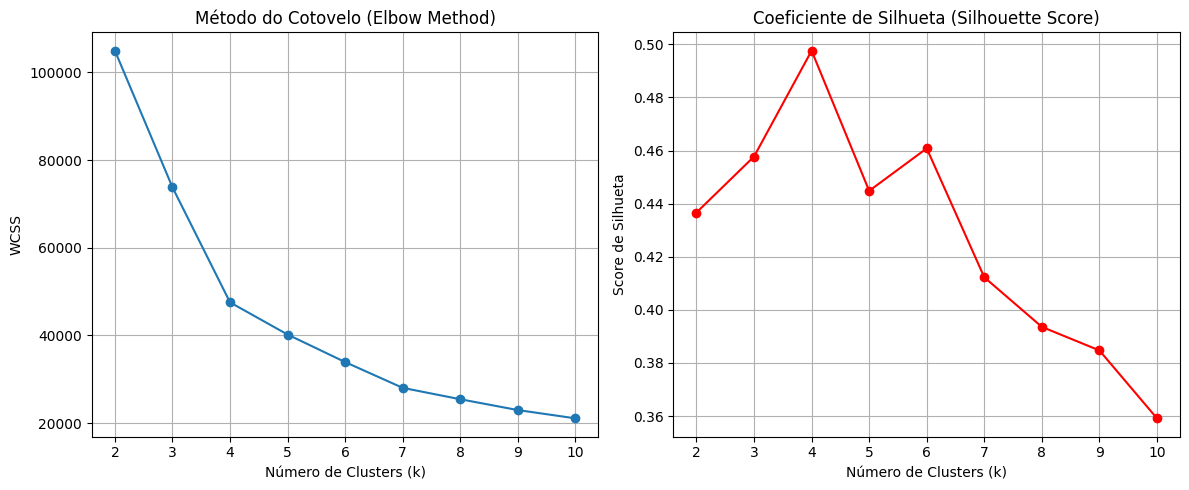


Scores de Silhueta por número de clusters (k):
k=2: 0.4367
k=3: 0.4577
k=4: 0.4976
k=5: 0.4448
k=6: 0.4608
k=7: 0.4123
k=8: 0.3936
k=9: 0.3847
k=10: 0.3591


In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Usaremos os dados transformados logaritmicamente (df_log)
X = df_log.copy()

# Lista para armazenar o WCSS (Within-Cluster Sum of Squares) para o método do cotovelo
wcss = []
# Lista para armazenar o silhouette score
silhouette_scores = []

# Definir um range de k para testar
k_range = range(2, 11) # Geralmente começa de 2 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init para evitar warnings
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    # Calcular o silhouette score (requer pelo menos 2 clusters)
    if k > 1:
        score = silhouette_score(X, kmeans.labels_)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(np.nan) # Para alinhar os índices, embora o k_range comece em 2

# Plotar o método do cotovelo
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, wcss, marker='o')
plt.title('Método do Cotovelo (Elbow Method)')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)

# Plotar o Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', color='red')
plt.title('Coeficiente de Silhueta (Silhouette Score)')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Score de Silhueta')
plt.grid(True)

plt.tight_layout()
plt.show()

# Imprimir os scores para análise
print("\nScores de Silhueta por número de clusters (k):")
for k, score in zip(k_range, silhouette_scores):
    if not np.isnan(score):
        print(f"k={k}: {score:.4f}")

In [14]:
from sklearn.cluster import KMeans

# Aplicar KMeans com 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
df_escopo["Cluster"] = kmeans.fit_predict(X)

# Visualizar quantos clientes ficaram em cada cluster
print("Distribuição dos clusters:")
print(df_escopo["Cluster"].value_counts())

# Estatísticas médias por cluster
print("\nMédias das variáveis por cluster:")
print(df_escopo.groupby("Cluster").mean())

Distribuição dos clusters:
Cluster
0    4907
1    4246
3    1990
2    1187
Name: count, dtype: int64

Médias das variáveis por cluster:
         Administrative  Administrative_Duration  Informational  \
Cluster                                                           
0              0.073365                 0.255847       0.114530   
1              3.988931               138.667506       0.071597   
2              0.181129                 3.384083       0.036226   
3              5.544724               202.230596       2.663317   

         Informational_Duration  ProductRelated  ProductRelated_Duration  
Cluster                                                                   
0                      2.444902       20.737518               783.763410  
1                      0.162451       35.492699              1275.035009  
2                      0.374628        1.873631                 7.366293  
3                    206.991499       68.625126              2745.101208  


/tmp/ipython-input-1467276151.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_escopo["Cluster"] = kmeans.fit_predict(X)


In [15]:
df_escopo = df[variaveis].copy()  # já garante cópia independente
df_escopo.loc[:, "Cluster"] = kmeans.fit_predict(X)

## Avaliação dos grupos

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final.
- Se puder, sugira nomes para os grupos.

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*).
- Qual grupo possui clientes mais propensos à compra?

Com base no Silhouette Score (melhor em k=4) e na interpretação dos perfis, a solução com 4 clusters é a mais adequada.
Sugestão de nomes:
- Cluster 0 → Exploradores rápidos
- Cluster 1 → Pesquisadores de produto
- Cluster 2 → Visitantes ocasionais
- Cluster 3 → Engajados profundos

📈 Avaliação de resultados (variáveis fora do escopo)
Bounce Rate
- Visitantes ocasionais (Cluster 2) tendem a ter bounce rate mais alto, pois entram e saem sem explorar.
- Engajados profundos (Cluster 3) devem ter bounce rate mais baixo, pois navegam bastante.
Revenue (compra)
- Engajados profundos (Cluster 3) → maior propensão à compra, pois exploram produtos e informações com profundidade.
- Pesquisadores de produto (Cluster 1) → também têm boa propensão, pois passam tempo significativo em páginas de produto.
- Exploradores rápidos (Cluster 0) → propensão intermediária.
- Visitantes ocasionais (Cluster 2) → menor propensão à compra.
👉 Conclusão: o grupo Engajados profundos (Cluster 3) é o mais propenso à compra, seguido pelos Pesquisadores de produto (Cluster 1).

